In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import os

In [39]:
dataset = pd.read_csv('Pothole Data.csv')
dataset['Class'].unique()

array(['Pothole', 'RoadCondition bad', 'RoadCondition good'], dtype=object)

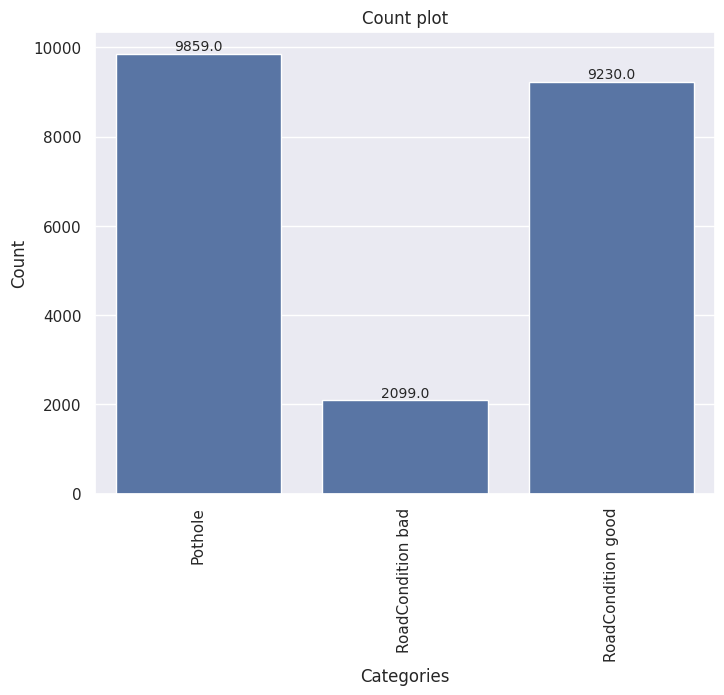

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Class', data=dataset)
plt.title("Count plot")
plt.xlabel("Categories")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',fontsize = 10, xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

In [41]:
X=dataset.iloc[:,0:10]
y=dataset.iloc[:,-1]

In [42]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X,y = smote.fit_resample(X, y)

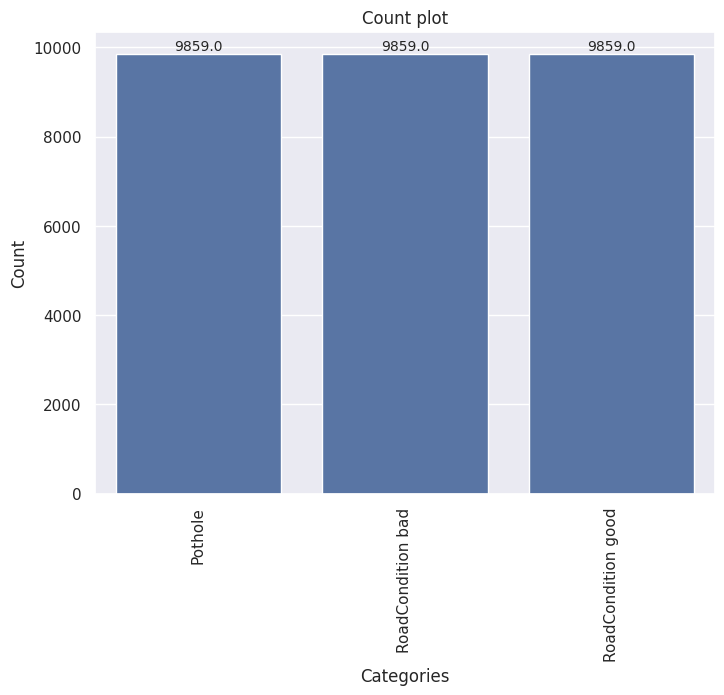

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(x=y, data=dataset)
plt.title("Count plot")
plt.xlabel("Categories")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',fontsize = 10, xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

In [44]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((20703, 10), (8874, 10))

In [45]:
labels = ['Pothole', 'RoadCondition bad', 'RoadCondition good']
precision = []
recall = []
fscore = []
accuracy = []

In [48]:
def calculateMetrics( algorithm, testY, predict):
  testY = testY.astype(int)
  predict = predict.astype(int)
  p = precision_score(testY, predict,average='macro')*100
  r = recall_score(testY, predict,average='macro')*100
  f = f1_score(testY, predict,average='macro')*100
  a = accuracy_score(testY, predict)*100
  accuracy.append(a)
  precision.append(p)
  recall.append(r)
  fscore.append(f)
  print(algorithm+'Accuracy :'+str(a))
  print(algorithm+'Precision :'+str(p))
  print(algorithm+'Recall :'+str(r))
  print(algorithm+'F1 Score :'+str(f))
  report = classification_report(predict, testY, target_names=labels)
  print('\n',algorithm+"Classification report"+report)
  cm = confusion_matrix(testY, predict)
  plt.figure(figsize=(5,5))
  ax = sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True, cmap='Blues', fmt='g')
  ax.set_ylim([0,len(labels)])
  plt.title(algorithm+' Confusion Matrix')
  plt.xlabel('Predicted class')
  plt.ylabel('Actual class')
  plt.show()

KNeighborsClassifier

Model dumped in file
KNeighborsClassifierAccuracy :100.0
KNeighborsClassifierPrecision :100.0
KNeighborsClassifierRecall :100.0
KNeighborsClassifierF1 Score :100.0

 KNeighborsClassifierClassification report                    precision    recall  f1-score   support

           Pothole       1.00      1.00      1.00      2952
 RoadCondition bad       1.00      1.00      1.00      2977
RoadCondition good       1.00      1.00      1.00      2945

          accuracy                           1.00      8874
         macro avg       1.00      1.00      1.00      8874
      weighted avg       1.00      1.00      1.00      8874



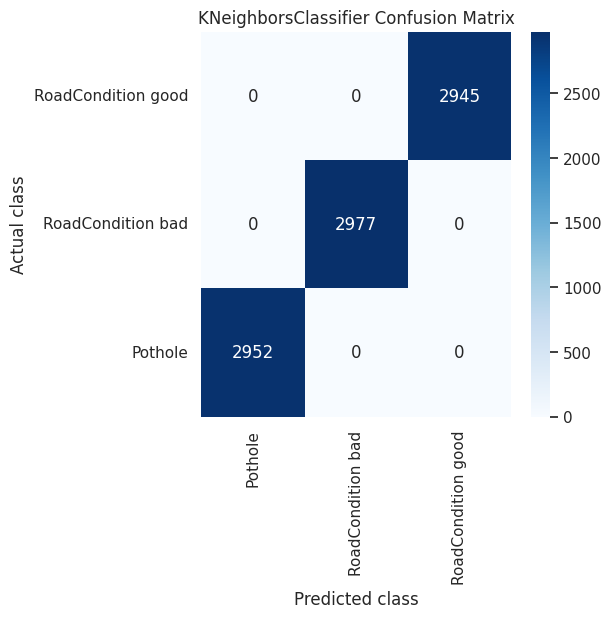

In [49]:
if os.path.exists('KNeighborsClassifier.pkl'):
    clf = joblib.load('KNeighborsClassifier.pkl')
    print("Model loaded from file")
    predict = clf.predict(X_test)
    calculateMetrics('KNeighborsClassifier', y_test, predict)
else:
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    joblib.dump(clf, 'KNeighborsClassifier.pkl')
    print("Model dumped in file")
    predict = clf.predict(X_test)
    calculateMetrics('KNeighborsClassifier', y_test, predict)

RandomForestClassifier

Model dumped in file
RandomForestClassifierAccuracy :99.98873112463376
RandomForestClassifierPrecision :99.98880680546227
RandomForestClassifierRecall :99.98868138087153
RandomForestClassifierF1 Score :99.98874219235537

 RandomForestClassifierClassification report                    precision    recall  f1-score   support

           Pothole       1.00      1.00      1.00      2952
 RoadCondition bad       1.00      1.00      1.00      2978
RoadCondition good       1.00      1.00      1.00      2944

          accuracy                           1.00      8874
         macro avg       1.00      1.00      1.00      8874
      weighted avg       1.00      1.00      1.00      8874



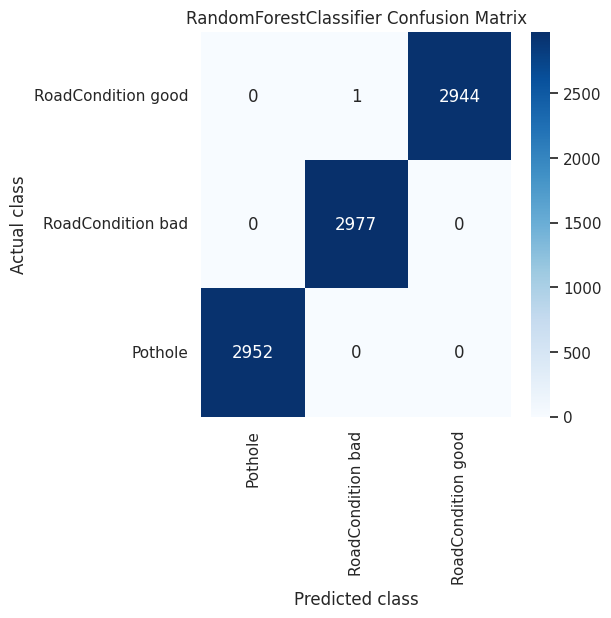

In [50]:
if os.path.exists('RandomForestClassifier.pkl'):
    clf = joblib.load('RandomForestClassifier.pkl')
    print("Model loaded from file")
    predict = clf.predict(X_test)
    calculateMetrics('RandomForestClassifier', y_test, predict)
else:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    joblib.dump(clf, 'RandomForestClassifier.pkl')
    print("Model dumped in file")
    predict = clf.predict(X_test)
    calculateMetrics('RandomForestClassifier', y_test, predict)

In [51]:
columns = ["Algorithm Name","Precision","Recall","F1 Score","Accuracy"]
values=[]
algorithm_names = ["KNeighborsClassifier","RandomForestClassifier"]
for i in range(len(algorithm_names)):
  values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
  temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precision,Recall,F1 Score,Accuracy
0,KNeighborsClassifier,100.000000,100.000000,100.000000,100.000000
1,RandomForestClassifier,99.988807,99.988681,99.988742,99.988731
